## 2표본 이항(비율) 차이분석 ==> chi-square test

In [1]:
# -*- coding: utf-8 -*-
#컨벤션
%matplotlib inline
from pandas import DataFrame, Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels
import math

In [2]:
#skipinitialspace 컬럼의 빈칸 없애고 전체 자료 읽어 들이기
my_df = pd.read_csv('coupon.csv', skipinitialspace=True)

In [3]:
#변수 확인
print(my_df.head())
print(my_df.tail())
print(my_df.info())
print(my_df.describe())

   no  type  category   amount  week
0   1     1       4.0  99300.0   1.0
1   2     1       2.0  98300.0   1.0
2   4     2       NaN      NaN   NaN
3   6     1       NaN      NaN   NaN
4   9     2       NaN      NaN   NaN
      no  type  category    amount  week
196  295     2       NaN       NaN   NaN
197  296     2       NaN       NaN   NaN
198  298     2       NaN       NaN   NaN
199  299     2       4.0  152400.0   1.0
200  300     2       1.0   37600.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
no          201 non-null int64
type        201 non-null int64
category    117 non-null float64
amount      117 non-null float64
week        117 non-null float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB
None
               no        type    category         amount        week
count  201.000000  201.000000  117.000000     117.000000  117.000000
mean   149.323383    1.437811    2.495726   86906.837607    0.555556
std  

In [4]:
#response 파생변수 생성
my_df['response'] = [0 if np.isnan(x) else 1 for x in my_df.amount]
my_df[['amount','response']].head(10)

,amount,response
0,99300.0,1
1,98300.0,1
2,NaN,0
3,NaN,0
4,NaN,0
5,40900.0,1
6,76400.0,1
7,83800.0,1
8,155000.0,1
9,102800.0,1


In [5]:
#레이블 선언
type_lables = {1: 'discount', 2: 'mileage'}
response_lables = {0: 'not used', 1: 'used'}

In [6]:
my_df.type.value_counts(normalize=False, sort=False)

1    113
2     88
Name: type, dtype: int64

In [7]:
my_df.type.value_counts(normalize=True, sort=False)

1    0.562189
2    0.437811
Name: type, dtype: float64

In [8]:
my_df.response.value_counts(normalize=False, sort=False)

0     84
1    117
Name: response, dtype: int64

In [9]:
my_df.response.value_counts(normalize=True, sort=False)

0    0.41791
1    0.58209
Name: response, dtype: float64

In [12]:
my_df_cross = pd.crosstab(my_df.type, my_df.response, margins=False)
my_df_cross

response,0,1
type,,
1,37,76
2,47,41


In [13]:
my_df_cross = pd.crosstab(my_df.type, my_df.response, margins=False, normalize='index')
my_df_cross

response,0,1
type,,
1,0.327434,0.672566
2,0.534091,0.465909


In [14]:
my_df_cross.columns = response_lables.values()
my_df_cross.columns

Index(['not used', 'used'], dtype='object')

In [15]:
my_df_cross.index = type_lables.values()
my_df_cross.index

Index(['discount', 'mileage'], dtype='object')

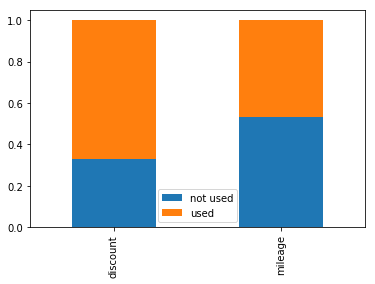

In [15]:
my_df_cross.plot(kind = 'bar', stacked = 1)

In [16]:
my_df_cross = pd.crosstab(my_df.type, my_df.response, margins=False)
stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)

(a, b, c, d) = stats.chi2_contingency(my_df_cross, correction=True, lambda_=None)
print('Chi = %4.3f, p-value = %4.3f, df = %0.0d'% (a, b, c))

Chi = 7.857, p-value = 0.005, df = 1


## end of documents